# Binary classification of the MNIST data set

* loads the MNIST data set
* conducts a bianary classification between 0 and all other numbers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

plt.rcParams["figure.figsize"] = [10, 8]
matplotlib.rc("savefig", dpi=200)

from IPython.display import display, Javascript

disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

10000 test images
60000 training images


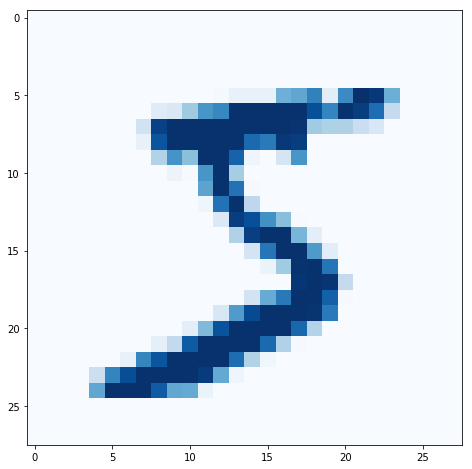

1.0


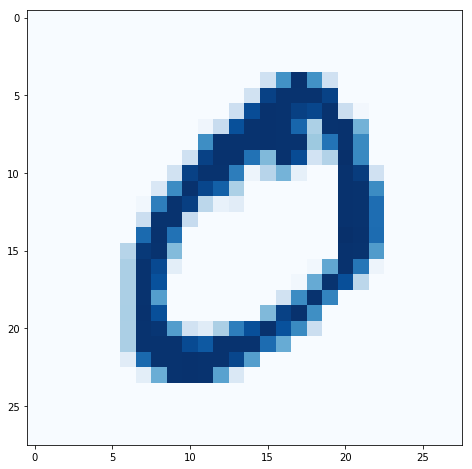

0.0


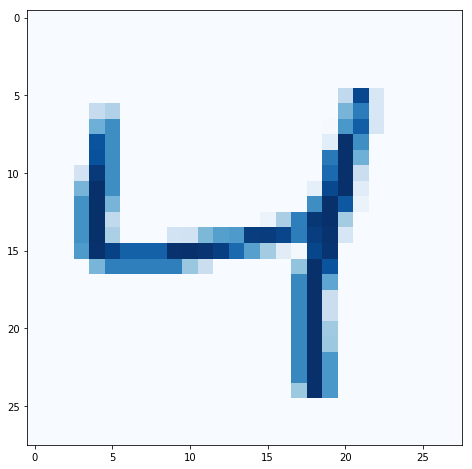

1.0


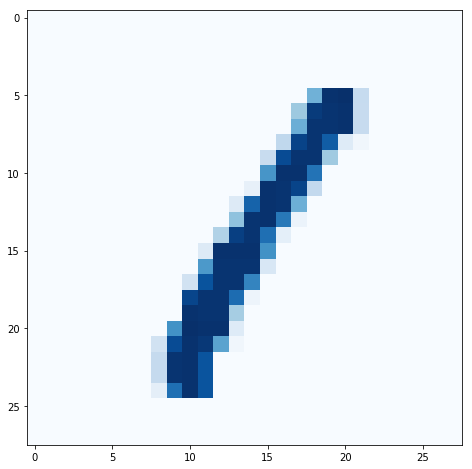

1.0


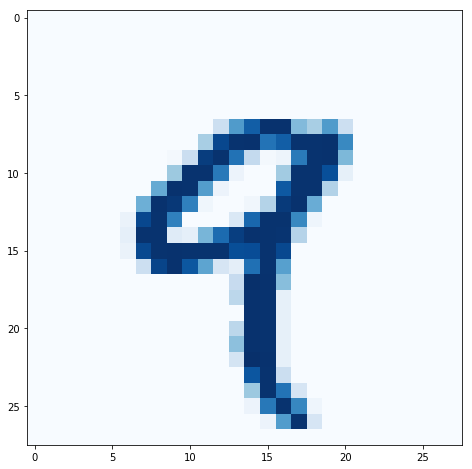

1.0


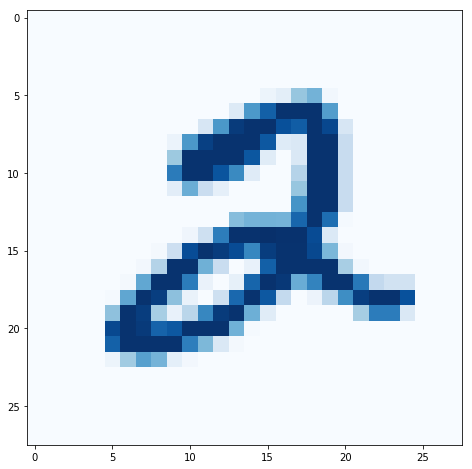

1.0


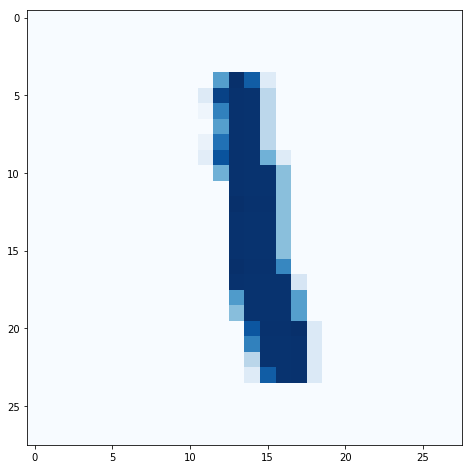

1.0


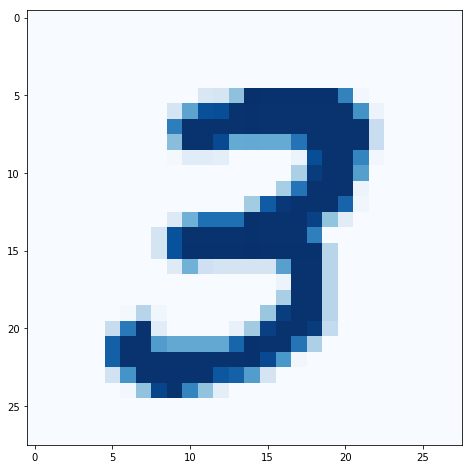

1.0


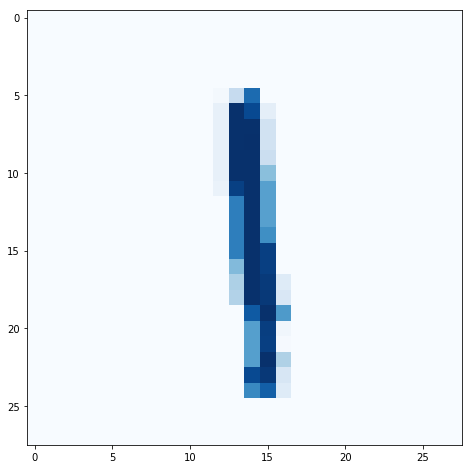

1.0


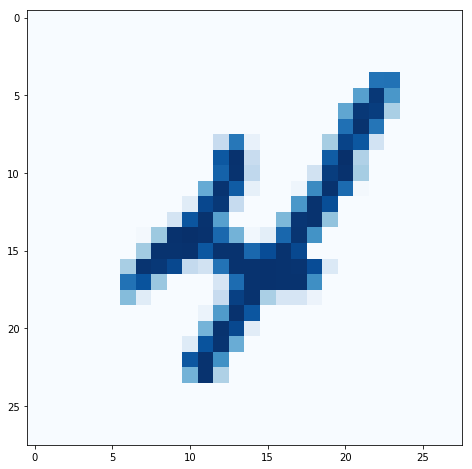

1.0


In [3]:
import mnist

data = mnist.MNIST('./MNIST/')
print('%d test images' % len(data.test_imgs))
print('%d training images' % len(data.train_imgs))

# normalize
train_data = [(data.train_imgs[i].reshape( (data.rows * data.cols, ) )  / 255.0, \
               data.train_labels[i]) for i in range(len(data.train_imgs))]

test_data = [(data.test_imgs[i].reshape( (data.rows * data.cols, ) ) / 255.0, \
              data.test_labels[i]) for i in range(len(data.test_imgs))]

# training data
X_train = np.array([train_data[i][0] for i in range(len(train_data))])
Y_train = np.array([train_data[i][1] for i in range(len(train_data))])

Y_train = np.where(Y_train > 0, 1.0, 0.0)

# test data
X_test = np.array([test_data[i][0] for i in range(len(test_data))])
Y_test = np.array([test_data[i][1] for i in range(len(test_data))])

Y_test = np.where(Y_test > 0, 1.0, 0.0)

# some examples
for i in range(10):
    plt.imshow(X_train[i].reshape(data.rows, data.cols) ,cmap='Blues')
    plt.show()
    print(Y_train[i])


In [4]:
class Adaline:

    def __init__(self, num):
        '''
        initialize class for `num` input signals
        '''

        # weights of the Adaline, initialized to zero
        # note the '1 + ' as the first weight entry is the threshold
        self.w_ = np.zeros(1 + num)

        return
    
    def activation_input(self, X):
        '''
        calculate the activation input of the neuron
        '''
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def classify(self, X):
        '''
        classify the data by sending the activation input through a step function
        '''
        return np.where(self.activation_input(X) >= 0.5, 1.0, 0.0)
    
    def learn(self, X_train, Y_train, eta=0.01, epochs=1000):
        '''
        fit training data according to eta and n_iter
        and log the errors in errors_
        '''

        # we initialize two list, each for the misclassifications and the cost function
        self.train_errors_ = []
        self.train_loss_ = []

        # for all the epoch
        for _ in range(epochs):
            # classify the traning features
            Z = self.classify(X_train)
            # count the misqualifications for the logging
            err = 0
            for z, y in zip(Z, Y_train):
                err += int(z != y)
            # ans save them in the list for later use
            self.train_errors_.append(err)
            
            # compute the activation input of the entire traning features
            output = self.activation_input(X_train)
            # and then the deviation from the labels
            delta = Y_train - output
            # the following is an implmentation of the adaline update rule
            self.w_[1:] += eta * X_train.T.dot(delta) / len(delta)
            self.w_[0] += eta * delta.sum() / len(delta)
            # and finally, we record the loss function
            loss = (delta ** 2).sum() / len(delta)
            # and save it for later use
            self.train_loss_.append(loss)

        return
    
    def plot_train_loss(self):
        '''
        plots the loss function value per epoch
        '''

        # create two lists, one enumerating the epochs, the other the cost values
        epochs, num_errs = np.arange(len(self.train_loss_)), np.array(self.train_loss_)

        # plot the loss per epoch
        fig = plt.figure()
        axs = plt.gca()
        axs.set_xlabel('epoch')
        axs.set_ylabel('loss')
        axs.set_title('Loss during training')
        plt.plot(epochs, num_errs)

        return

    def plot_train_errors(self):
        '''
        plot the number of misclassifications per epoch
        '''

        # create two list, one with epoch numbers, and one with the errors per epoch
        epochs, num_errs = np.arange(len(self.train_errors_)), np.array(self.train_errors_)

        # plot the above data
        fig = plt.figure()
        axs = plt.gca()
        axs.set_xlabel('epoch')
        axs.set_ylabel('errors')
        axs.set_title('Errors during training')
        plt.plot(epochs, num_errs)

        return

    def efficiency(self, X_test, Y_test): 
        '''
        compute the efficiency = 1 - number of misclassifications / number of data points
        '''

        err = 0
        
        # classify the test data
        Z = self.classify(X_test)
        for z, y in zip(Z, Y_test):
            err += int(z != y)

        return 1 - float(err) / len(X_test)

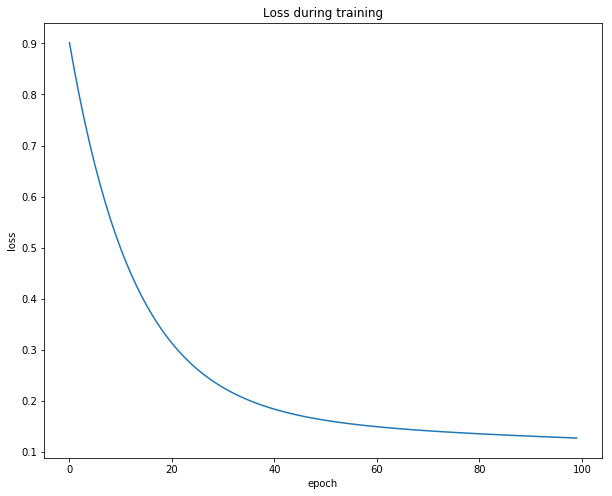

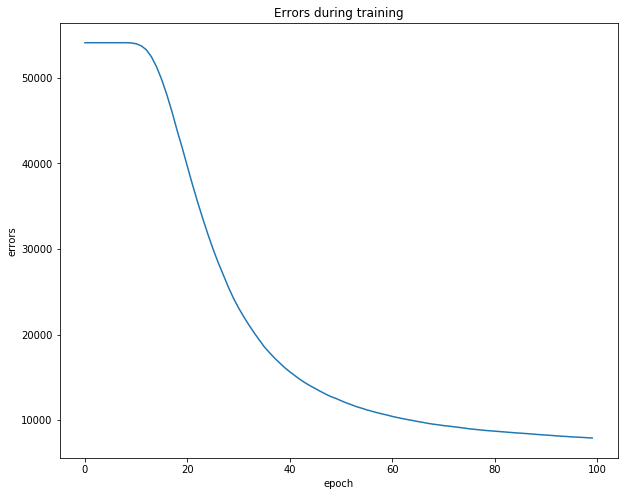

Efficiency (train) = 0.86875
Efficiency (test)  = 0.8746


In [5]:
ada = Adaline(X_test[0].shape[0])
ada.learn(X_train, Y_train, eta=0.001, epochs=100)

ada.plot_train_loss()
ada.plot_train_errors()

eff_train = ada.efficiency(X_train, Y_train)
eff_test = ada.efficiency(X_test, Y_test)

plt.show()

print('Efficiency (train) =', eff_train)
print('Efficiency (test)  =', eff_test)